**4AG20 - Slender Structure** - RICHARD Alexandre, WANG JYAYU, ACKBARALLY Faiz, DUVIVIER Valentin

---



In [ ]:
# python packages
import numpy as np
import matplotlib.pylab as plt

from IPython.display import display, Image, Math

%matplotlib inline

### A - Measure

In [ ]:
### Data

## Geometry

# Beam
H       = 0.6 * 10**-2   #[m] # diameter beam
delta_H =  1  * 10**-3   #[m] # # precision diameter beam

Ls = 7.5  * 10**-2       #[m] # length short beam
Ll = 16.5 * 10**-2       #[m] # length long  beam

delta_L = 1 * 10**-3     #[m] # # precision length beam

# Coil
d       = 0.7 * 10**-3   #[m] # diameter coil
delta_d = 0.1 * 10**-3   #[m] # # precision diameter coil

Ns = 38                  #[]  # number coils - short beam
Nl = 78                  #[]  # number coils - long  beam
delta_N = 1              #[m] # # precision length beam

# -----------------------------------------------------------------

## Material
E  = 210  * 10**9        #[Pa] # Young modulus
delta_E = 10**9          #[Pa] # # precision Young modulus beam

nu = .3
G  = E / (2*(1 + nu))    #[Pa] # Shearing coefficient

I = np.pi * (d/2)**4 / 4 #[kg.m²] # Moment of inertia coil : Igy or Igz
J = 2*I                  #[kg.m²] # Moment of inertia coil : Igy + Igz
delta_I = round(I)       #[kg.m²] # # precision moment of inertia coil

# -----------------------------------------------------------------

## Force
m = 15 * 10**-3          #[kg]    # mass to add in chosen point
g = 9.81                 #[m.s-2] # gravity acceleration

P = m * g                #[N]     # Force applied at chosen point

### B - Calculate

##### 1. $\underline{\text{Extensional stiffness}}$

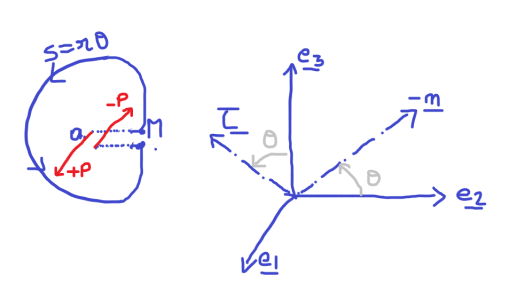

In [ ]:
Aeq_s = G*d**4*Ls / (8*Ns*H**3)
Aeq_l = G*d**4*Ll / (8*Nl*H**3)

print(Aeq_s, Aeq_l)

22.14991354588394 23.740163749178176


##### 2. $\underline{\text{Bending stiffness}}$

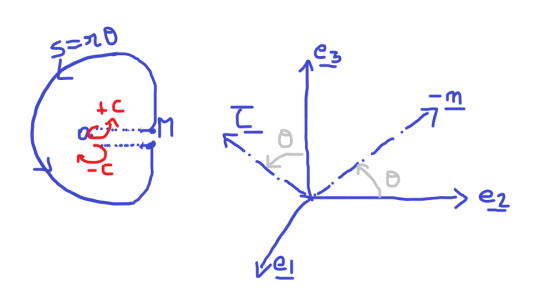

In [ ]:
Deq_s = 4*Ls*E*G * I / (Ns*np.pi*H * (E+2*G))
Deq_l = 4*Ll*E*G * I / (Nl*np.pi*H * (E+2*G))

print(Deq_s, Deq_l)

0.00022535129433638444 0.00024153036162207357


##### 3. $\underline{\text{Shear stiffness}}$

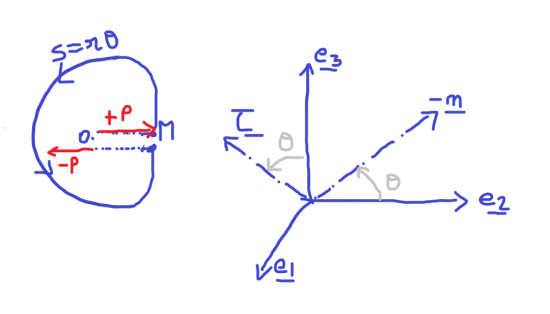

In [ ]:
Feq_s        = (2*Ls - Ns*np.pi*H) / (Ns*np.pi*H * (1/Aeq_s + H**2/(4*E*I)) - 2*Ls**3/(3*Deq_s))
Feq_l        = (2*Ll - Nl*np.pi*H) / (Nl*np.pi*H * (1/Aeq_l + H**2/(4*E*I)) - 2*Ll**3/(3*Deq_l))

Feq_simple_s = 8*Ls*E*I / (np.pi * H**3 * Ns)
Feq_simple_l = 8*Ll*E*I / (np.pi * H**3 * Nl)

print(Feq_s, Feq_l, Feq_simple_s, Feq_simple_l)

0.4668032404070427 0.0924655609933552 57.58977521929825 61.72442574786324


In [ ]:
# Precision over previous result

delta_Feq_s = Feq_s * (delta_L/Ls + delta_E/E + delta_I/I - 3*delta_H/H - delta_N/Ns)
delta_Feq_l = Feq_l * (delta_L/Ll + delta_E/E + delta_I/I - 3*delta_H/H - delta_N/Nl)

In [ ]:
print(f'We have Feq = {Feq_s:.2E} +/- {np.abs(delta_Feq_s):.2E} for the short beam')
print(f'We have Feq = {Feq_l:.2E} +/- {np.abs(delta_Feq_l):.2E} for the long beam')

We have Feq = 4.67E-01 +/- 2.37E-01 for the short beam
We have Feq = 9.25E-02 +/- 4.64E-02 for the long beam


##### 4. $\underline{\text{Displacement} ~ v_{L} ~ \text{- short beam}}$

In [ ]:
v_L_s = P*Ls * (1/Feq_s - Ls**2/(3*Deq_s))
print(f'Displacement in x=L is v = {v_L_s:1.2E} m')

Displacement in x=L is v = -6.82E-02 m


##### 5. $\underline{\text{Displacement} ~ v_{L} ~ \text{- long  beam}}$


In [ ]:
v_L_l = P*Ll * (1/Feq_l - Ll**2/(3*Deq_l))
print(f'Displacement in x=L is v = {v_L_l:1.2E} m')

Displacement in x=L is v = -6.50E-01 m


### C - Comparison two beams